In [1]:
pip install spotipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
spotify_data = pd.read_csv('SpotifyFeatures.csv')
spotify_data.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
spotify_data.tail()

genre               artist_name                      track_name  \
232720  Soul                     Slave                    Son Of Slide   
232721  Soul  Jr Thomas & The Volcanos                    Burning Fire   
232722  Soul              Muddy Waters  (I'm Your) Hoochie Coochie Man   
232723  Soul                   R.LUM.R                   With My Words   
232724  Soul            Mint Condition  You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479

In [5]:
spotify_features_df = spotify_data
genre_OHE = pd.get_dummies(spotify_features_df.genre)
key_OHE = pd.get_dummies(spotify_features_df.key)

In [6]:
scaled_features = MinMaxScaler().fit_transform([
  spotify_features_df['acousticness'].values,
  spotify_features_df['danceability'].values,
  spotify_features_df['duration_ms'].values,
  spotify_features_df['energy'].values,
  spotify_features_df['instrumentalness'].values,
  spotify_features_df['liveness'].values,
  spotify_features_df['loudness'].values,
  spotify_features_df['speechiness'].values,
  spotify_features_df['tempo'].values,
  spotify_features_df['valence'].values,
  ])

In [7]:
#Storing the transformed column vectors into our dataframe
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [8]:
#discarding the categorical and unnecessary features 
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [9]:
#Appending the OHE columns of the categorical features
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [10]:
spotify_features_df.head()

track_id  acousticness  danceability  duration_ms    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.000025      0.000022          1.0  0.000028   
1  0BjC1NfoEOOusryehmNudP      0.000042      0.000045          1.0  0.000046   
2  0CoSDzoNIKCRs124s9uTVy      0.000087      0.000085          1.0  0.000082   
3  0Gc6TVm52BwZD07Ki6tIvf      0.000084      0.000081          1.0  0.000082   
4  0IuslXpMROHdEPvSl1fTQK      0.000267      0.000260          1.0  0.000259   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  B  C  C#  \
0          0.000018  0.000022       0.0     0.000019  0.001699  ...  0  0   1   
1          0.000040  0.000042       0.0     0.000041  0.001307  ...  0  0   0   
2          0.000082  0.000082       0.0     0.000082  0.000666  ...  0  1   0   
3          0.000080  0.000081       0.0     0.000080  0.001207  ...  0  0   1   
4          0.000257  0.000258       0.0     0.000256  0.001957  ...  0  0   0   

   D  D#  E  F  F#  G  G#  
0  0   0  0  0   0  0   0  
1  0   0  0  0   1  0   0  
2  0   0  0  0   0  0   0  
3  0   0  0  0   0  0   0  
4  0   0  0  1   0  0   0  

[5 rows x 50 columns]

In [11]:
client_id = '5c02dbc6e44d49d1be40823e5532776f'
client_secret= '09cbab54ba03495e8da8a6b2627a1618'

In [57]:
#Fetching the playlist
scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:5000/callback'
  )
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)

{'SelenaGomez ': '6prwz0Ymc4QV638brcoXhI', 'MixedMood': '360MoIEzFB7b4SNrhL3wdS', 'Mixed Moods': '7w2hJJSqLNNrzYUJFKpBdu', 'Best Hindi ': '5SplUAuhQsrCh3EeDabYpq', 'Sleeping Hindi Songs': '0sWNotyZeWfO0fOjwjrYQV', 'Best songs': '20q8MeUdjVLfg7WAbShtX2', 'Melody songs': '7lsXGJzUGmeIJWjNsdsUZI'}


In [59]:
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist
playlist_df = generate_playlist_df('SelenaGomez ', playlist_dic, spotify_data) 

In [60]:
playlist_df.head()

artist       track_name                track_id  \
33  Justin Bieber    Favorite Girl  4nTjkWK590oBDcnIxTr1mI   
31  Justin Bieber         One Time  6eDApnV9Jdb1nYahOlbbUh   
30  Justin Bieber             Baby  6epn3r7S14KUqlReYr77hA   
29  Justin Bieber  Never Say Never  5GYbkDveRD2I8M5ZJ14hWn   
28  Justin Bieber          Love Me  0yIywEquxORnu1dR0WYsdN   

                                                  url  \
33  https://i.scdn.co/image/ab67616d00001e027c3bb9...   
31  https://i.scdn.co/image/ab67616d00001e027c3bb9...   
30  https://i.scdn.co/image/ab67616d00001e02629dc9...   
29  https://i.scdn.co/image/ab67616d00001e0249130b...   
28  https://i.scdn.co/image/ab67616d00001e027c3bb9...   

                  date_added  
33 2023-11-30 17:31:42+00:00  
31 2023-11-30 17:31:41+00:00  
30 2023-11-30 17:31:41+00:00  
29 2023-11-30 17:31:40+00:00  
28 2023-11-30 17:31:40+00:00

In [61]:
playlist_df.tail()

artist       track_name                track_id  \
7   Selena Gomez    Come & Get It  6LoQHIo74tOzQ8EsLEkhgF   
6   Selena Gomez  Hands To Myself  1LoriJC05IrHIDwj3q0KC1   
5   Selena Gomez           Wolves  0tBbt8CrmxbjRP0pueQkyU   
3   Selena Gomez     Good For You  578Eooad7oUyn4stovZiPg   
17  Selena Gomez  Me & The Rhythm  7fBUnDgtSvYpYWuX4iAfns   

                                                  url  \
7   https://i.scdn.co/image/ab67616d00001e020e3669...   
6   https://i.scdn.co/image/ab67616d00001e02e6f5ed...   
5   https://i.scdn.co/image/ab67616d00001e02307910...   
3   https://i.scdn.co/image/ab67616d00001e02e6f5ed...   
17  https://i.scdn.co/image/ab67616d00001e02e6f5ed...   

                  date_added  
7  2023-11-30 17:31:20+00:00  
6  2023-11-30 17:31:20+00:00  
5  2023-11-30 17:31:20+00:00  
3  2023-11-30 17:31:20+00:00  
17 2023-11-30 17:31:20+00:00

In [62]:
!pip install Pillow



Defaulting to user installation because normal site-packages is not writeable


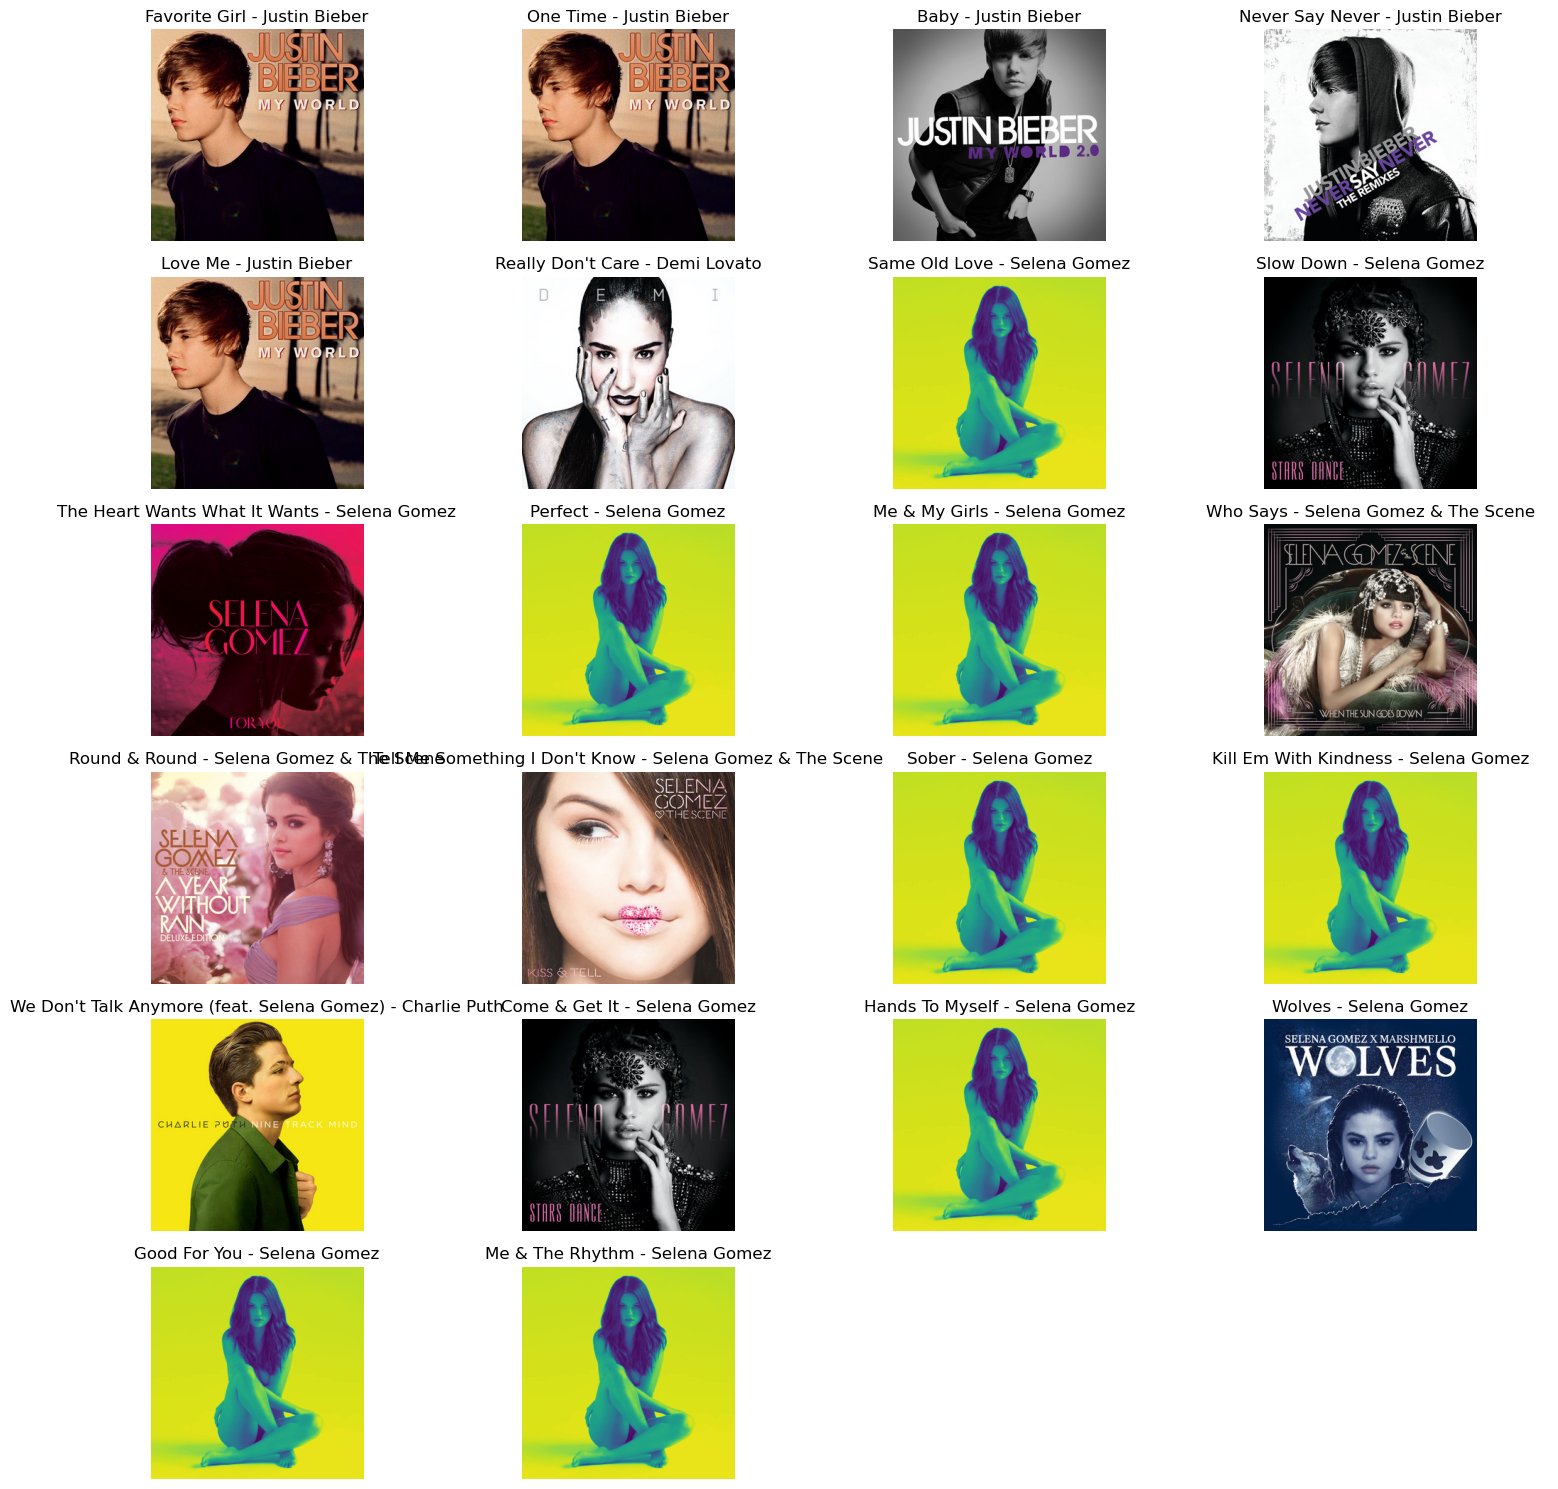

In [63]:
import urllib.request
from PIL import Image
import io
import matplotlib.pyplot as plt
import math

def visualize_cover_art(playlist_df, rows, cols):
    total_tracks = len(playlist_df)
    total_subplots = rows * cols

    # Calculate the number of rows needed
    num_rows = math.ceil(total_tracks / cols)

    # Create subplots
    fig, axs = plt.subplots(num_rows, cols, figsize=(15, 15))

    for i, ax in enumerate(axs.flat):
        # Check if there are more tracks to display
        if i < total_tracks:
            row = playlist_df.iloc[i]
            # Open the URL and read the image using Pillow
            response = urllib.request.urlopen(row['url'])
            img = Image.open(io.BytesIO(response.read()))

            # Display the image using Matplotlib
            ax.imshow(img)
            ax.set_title(f"{row['track_name']} - {row['artist']}")
            ax.axis('off')
        else:
            # Hide empty subplots
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize cover art for the tracks in your playlist DataFrame
visualize_cover_art(playlist_df, rows=3, cols=4)



In [64]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [65]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.head())

(50,)
                 track_id  acousticness  danceability  duration_ms    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.000025      0.000022          1.0  0.000028   
1  0BjC1NfoEOOusryehmNudP      0.000042      0.000045          1.0  0.000046   
2  0CoSDzoNIKCRs124s9uTVy      0.000087      0.000085          1.0  0.000082   
3  0Gc6TVm52BwZD07Ki6tIvf      0.000084      0.000081          1.0  0.000082   
4  0IuslXpMROHdEPvSl1fTQK      0.000267      0.000260          1.0  0.000259   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  B  C  C#  \
0          0.000018  0.000022       0.0     0.000019  0.001699  ...  0  0   1   
1          0.000040  0.000042       0.0     0.000041  0.001307  ...  0  0   0   
2          0.000082  0.000082       0.0     0.000082  0.000666  ...  0  1   0   
3          0.000080  0.000081       0.0     0.000080  0.001207  ...  0  0   1   
4          0.000257  0.000258       0.0     0.000256  0.001957  ...  0  0   0   

   D  D#  E  F  F#  G  G# 

In [66]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df, sp):
    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    
    # Calculate similarity scores
    similarity_scores = cosine_similarity(
        nonplaylist_df.drop(['track_id'], axis=1).values,
        playlist_vector.drop(labels='track_id').values.reshape(1, -1)
    )[:, 0]
    
    non_playlist['sim'] = similarity_scores
    
    # Sort and select top 15
    non_playlist_top15 = non_playlist.sort_values('sim', ascending=False).head(15)
    
    # Fetch URL using Spotify API
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: get_album_image_url(x, sp))
    
    return non_playlist_top15

def get_album_image_url(track_id, sp):
    try:
        return sp.track(track_id)['album']['images'][1]['url']
    except KeyError:
        # Handle KeyError, return a default URL or handle it based on your requirements
        return 'https://example.com/default_image.jpg'


In [69]:
print(top15.head())

         genre   artist_name     track_name                track_id  \
92230  Hip-Hop      Lil Durk      Bang Bros  4GlIlfwSYBNNbK6nu9HeRC   
70532  Hip-Hop           NAV   Never Change  0Cgig1rlaJEJ6bkHVV5v9o   
92275  Hip-Hop      GoldLink  Bedtime Story  2oHxuNlj8cdpqxpum3DWkj   
68882  Hip-Hop        Boogie        Skydive  0bgCMcpNvjH92GTQfZMvp4   
90875  Hip-Hop  Mark Battles           How?  2jKVh020rzpQEgwSkZBp53   

       popularity  acousticness  danceability  duration_ms    energy  \
92230          48      0.000049      0.000052          1.0  0.000051   
70532          57      0.000046      0.000050          1.0  0.000048   
92275          53      0.000051      0.000054          1.0  0.000054   
68882          61      0.000043      0.000044          1.0  0.000043   
90875          47      0.000043      0.000044          1.0  0.000044   

       instrumentalness key  liveness  loudness   mode  speechiness     tempo  \
92230          0.000048   G  0.000051       0.0  Minor     

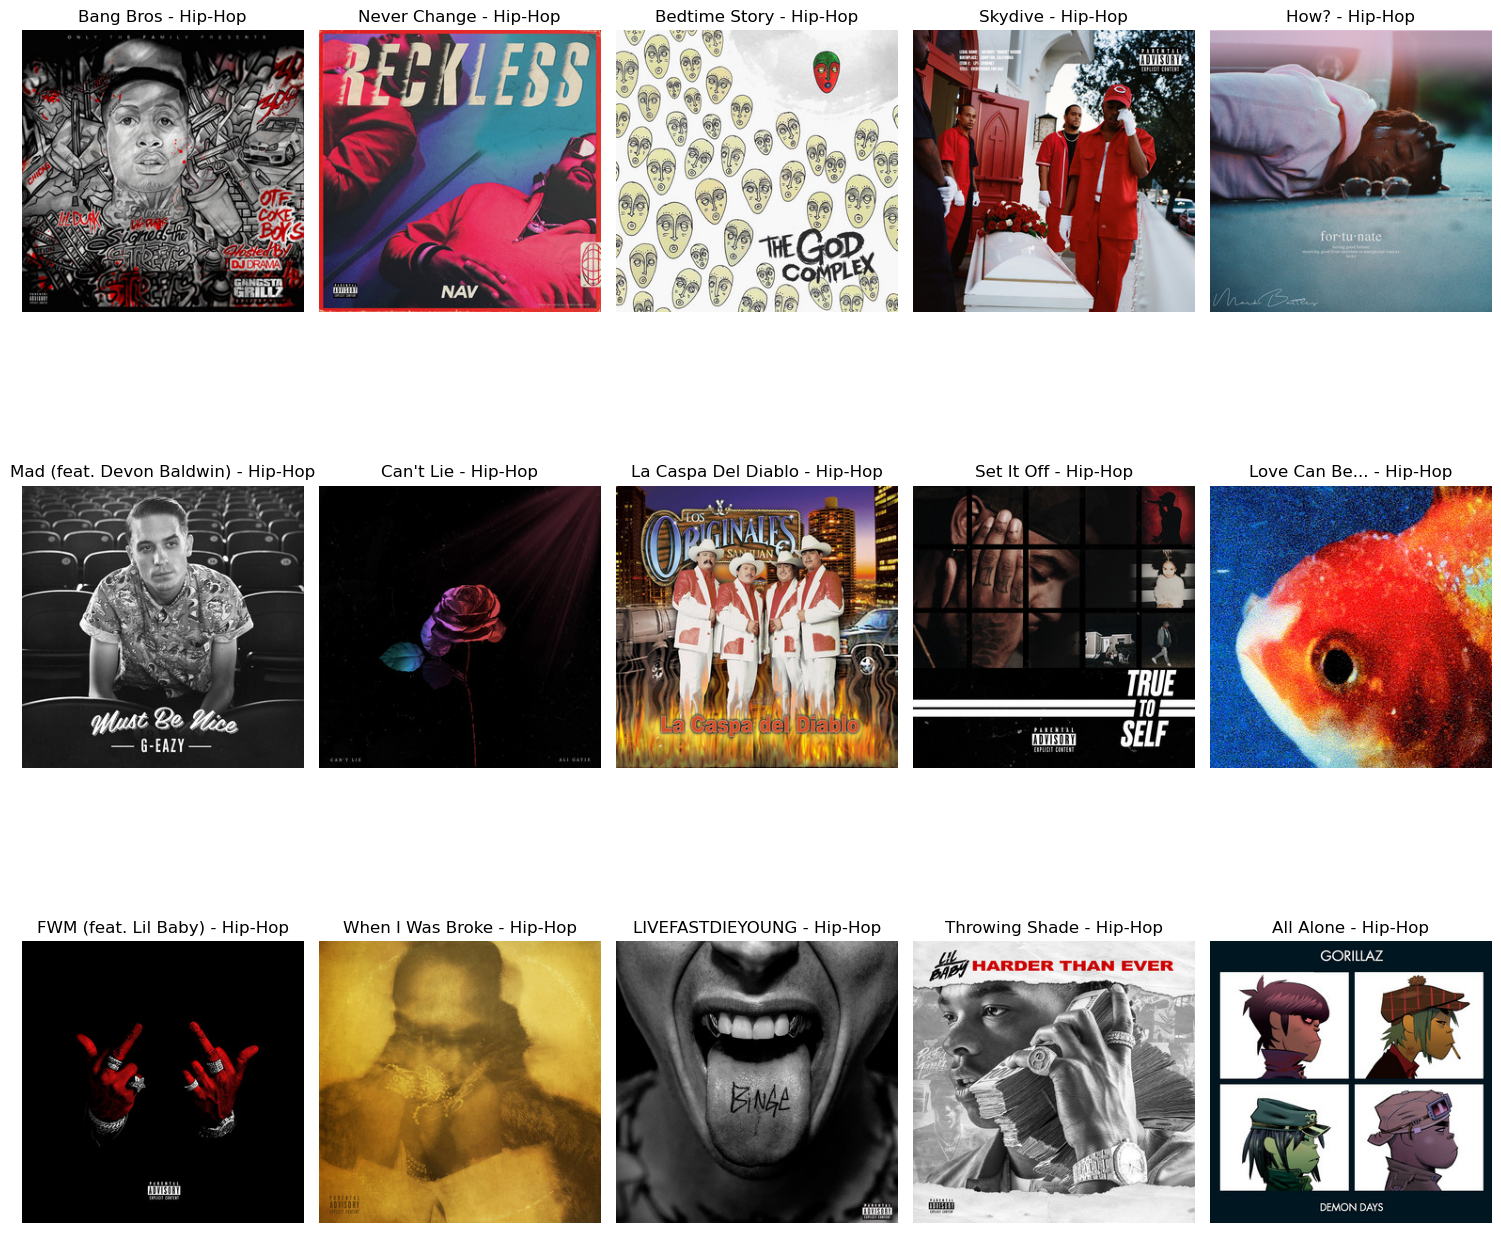

In [70]:
def visualize_cover_art_with_info(recommendation_df, rows, cols):
    total_tracks = len(recommendation_df)
    total_subplots = rows * cols

    # Calculate the number of rows needed
    num_rows = (total_tracks + cols - 1) // cols

    # Create subplots
    fig, axs = plt.subplots(num_rows, cols, figsize=(15, 15))

    for i, ax in enumerate(axs.flat):
        # Check if there are more tracks to display
        if i < total_tracks:
            row = recommendation_df.iloc[i]
            # Open the URL and read the image using Pillow
            response = urllib.request.urlopen(row['url'])
            img = Image.open(io.BytesIO(response.read()))

            # Display the image using Matplotlib
            ax.imshow(img)
            ax.set_title(f"{row['track_name']} - {row['genre']}")
            ax.axis('off')
        else:
            # Hide empty subplots
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize cover art for the recommended tracks
visualize_cover_art_with_info(top15, rows=5, cols=5)
